### Let us import the necessary liabraries and read our DataSet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df= pd.read_csv("heart.csv")

In [4]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Data Analysis

### Understanding our DataSet:

#### Age : Age of the patient

#### Sex : Sex of the patient

#### exang: exercise induced angina (1 = yes; 0 = no)

#### ca: number of major vessels (0-3)

#### cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)

#### chol : cholestoral in mg/dl fetched via BMI sensor

#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalach : maximum heart rate achieved

#### target : 0= less chance of heart attack 1= more chance of heart attack

In [6]:
df.shape

(303, 11)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

#### As we can see there are no null values in our Data Set

In [8]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

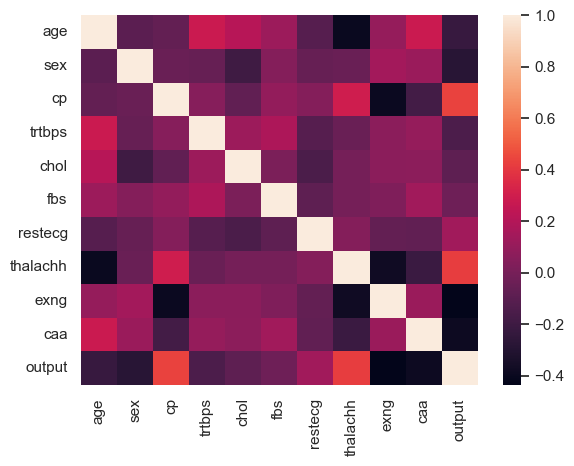

In [9]:
sns.heatmap(df.corr())

#### As we can see our variables are not highly correlated to each other 

#### We will do Uni and Bi variate analysis on our Features

<Axes: title={'center': 'Age of Patients'}, xlabel='Age', ylabel='count'>

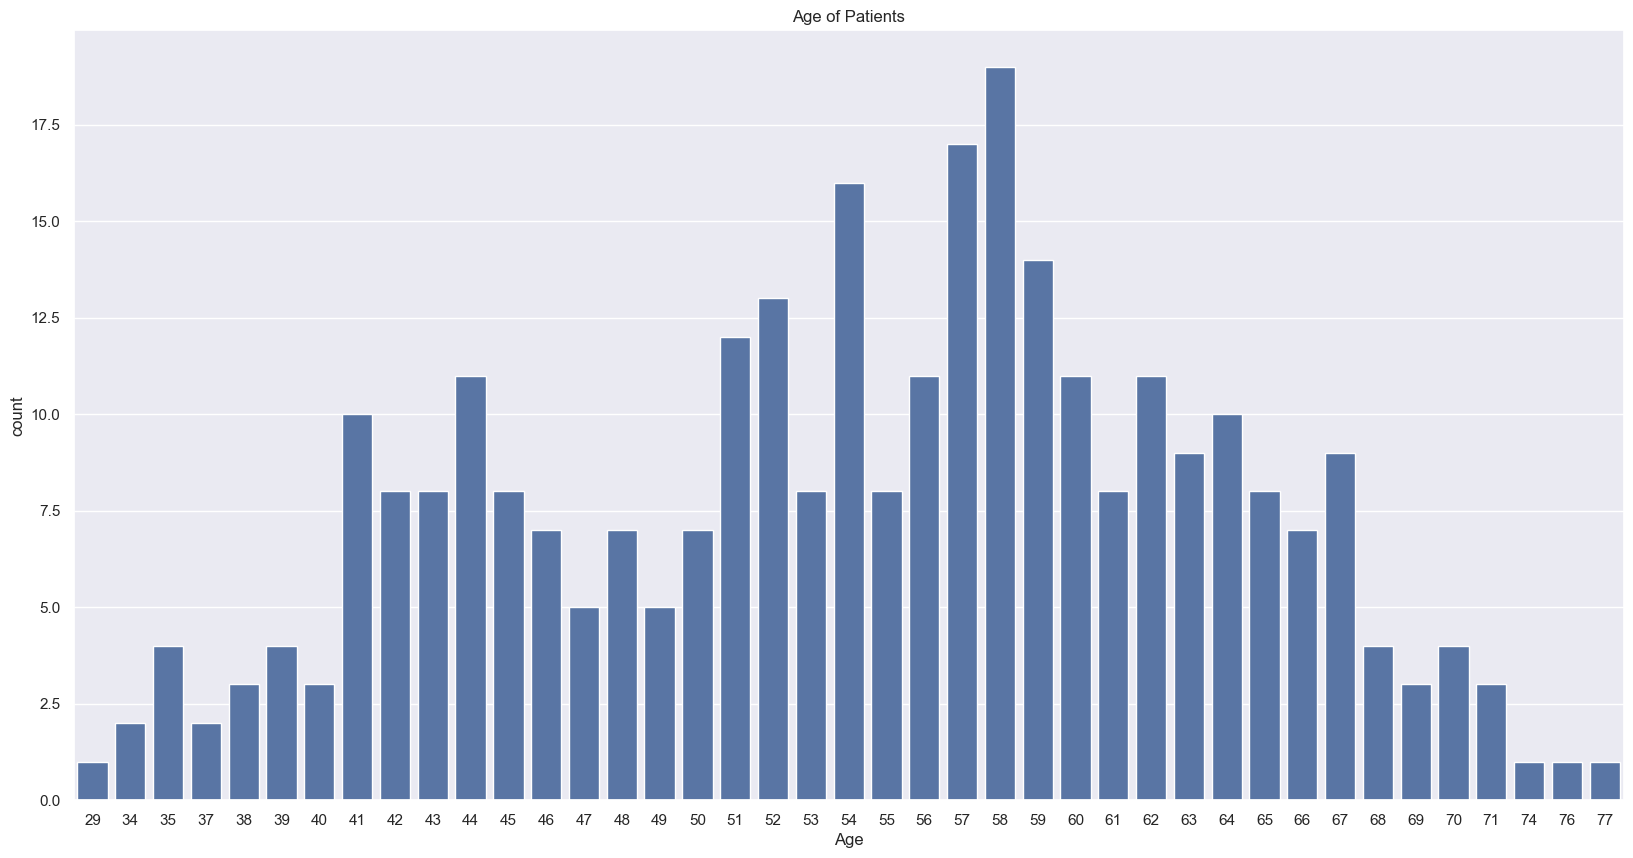

In [10]:

plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

#### As we can see the Patients are of Age Group 51-67years in majority

<Axes: title={'center': 'Sex of Patients,0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

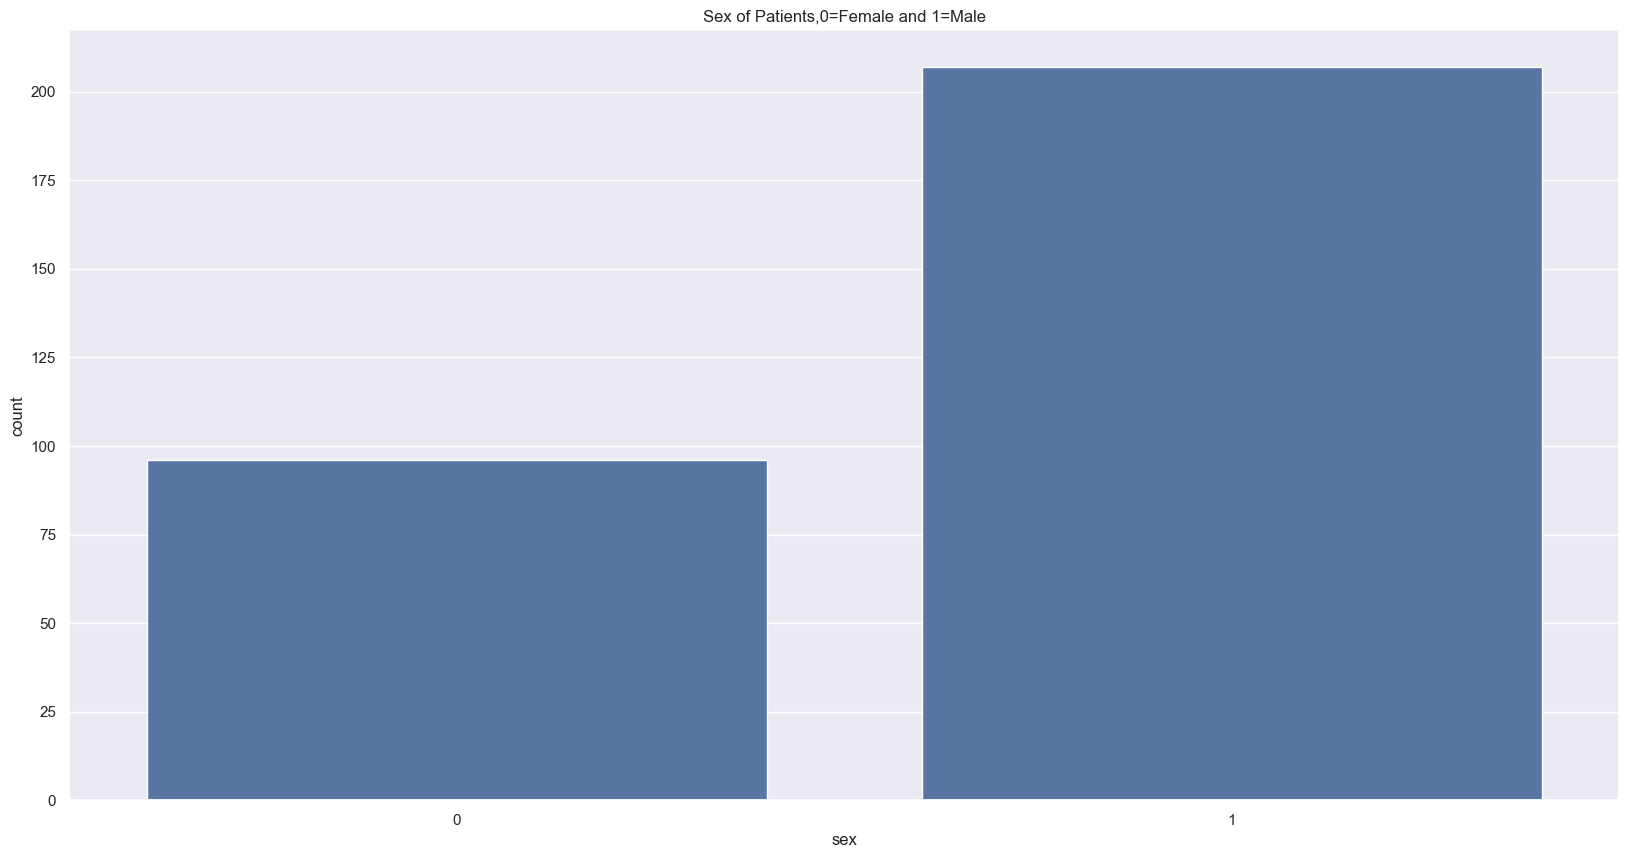

In [11]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)

In [12]:
cp_data= df['cp'].value_counts().reset_index()
cp_data['index'][3]= 'asymptomatic'
cp_data['index'][2]= 'non-anginal'
cp_data['index'][1]= 'Atyppical Anigma'
cp_data['index'][0]= 'Typical Anigma'
cp_data

KeyError: 'index'

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")

sns.barplot(x=cp_data['index'],y= cp_data['cp'])

#### We have seen how the the Chest Pain Category is distributed

In [ ]:
ecg_data= df['restecg'].value_counts().reset_index()
ecg_data['index'][0]= 'normal'
ecg_data['index'][1]= 'having ST-T wave abnormality'
ecg_data['index'][2]= 'showing probable or definite left ventricular hypertrophy by Estes'

ecg_data

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")

sns.barplot(x=ecg_data['index'],y= ecg_data['restecg'])

#### This is our ECG Data 

In [ ]:
sns.pairplot(df,hue='output',data=df)

### Let us see for our Continuous Variable

C:\Users\Admin\AppData\Local\Temp\ipykernel_2852\1144681631.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trtbps'], kde=True, color = 'magenta')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2852\1144681631.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalachh'], kde=True, col

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

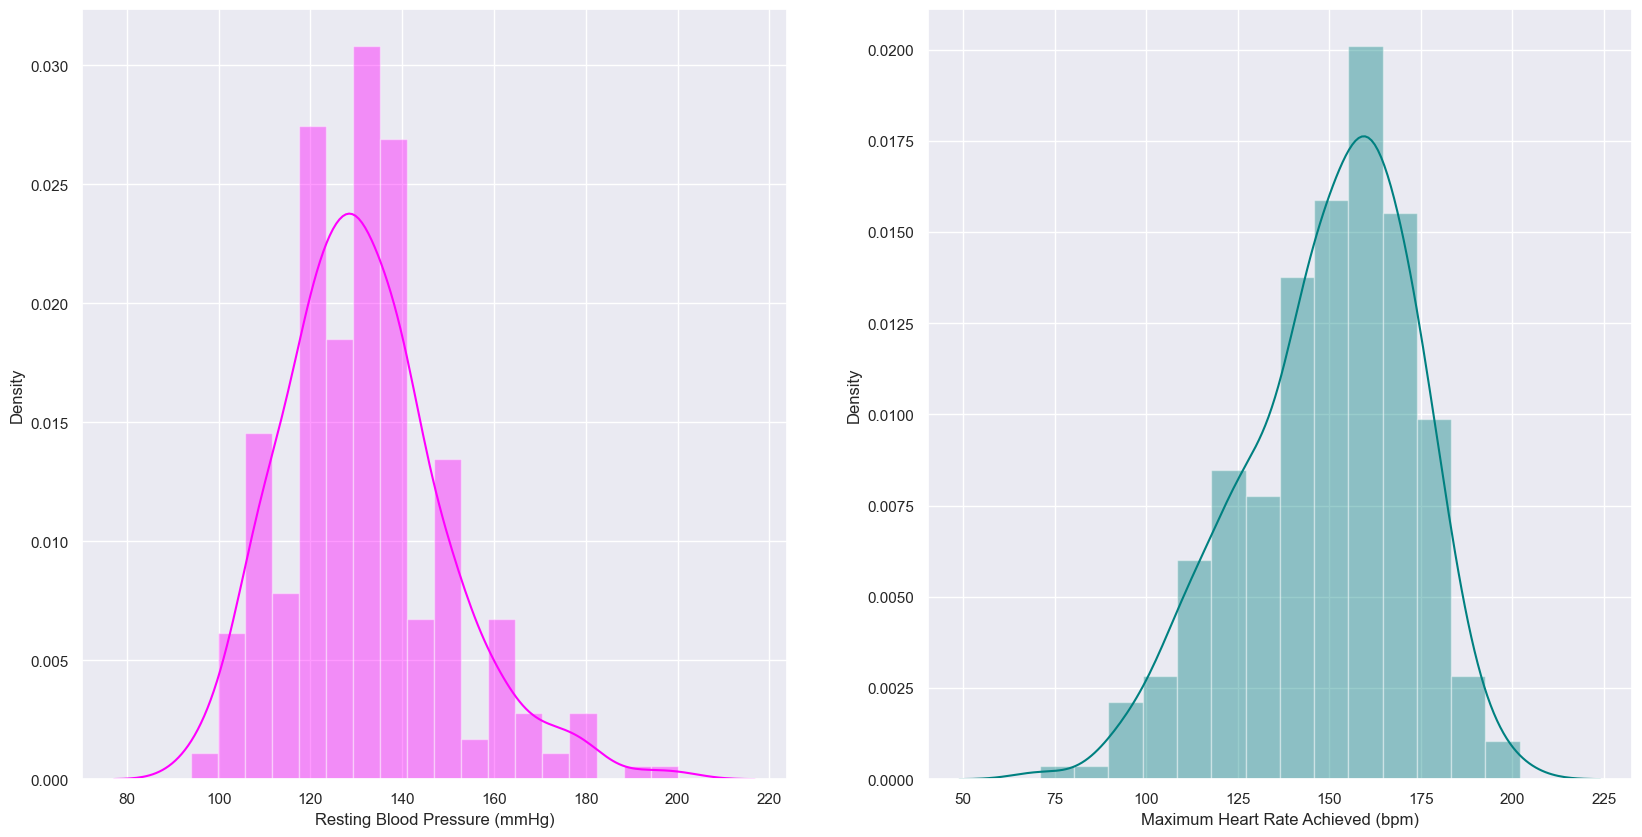

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

C:\Users\Admin\AppData\Local\Temp\ipykernel_2852\195076517.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], kde=True, color = 'red')


Text(0.5, 0, 'Cholestrol')

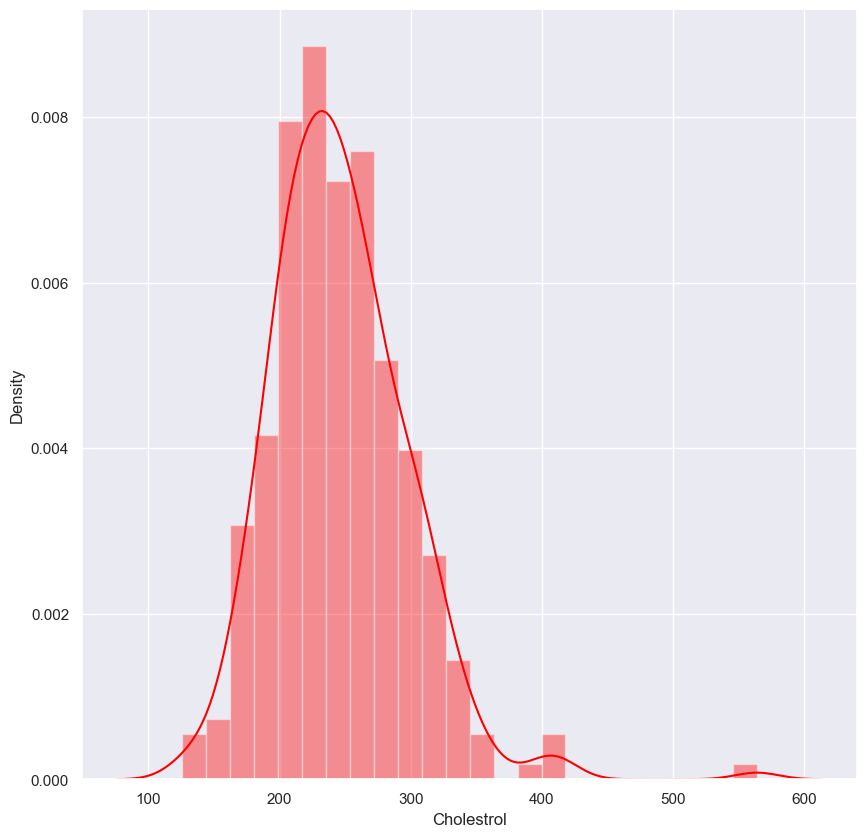

In [14]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

#### We have done the Analysis of the data now let's have a look at out data

In [15]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Let us do Standardisation

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scale=StandardScaler()

In [18]:
scale.fit(df)

StandardScaler()

In [19]:
df= scale.transform(df)

In [20]:
df=pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'])

In [21]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


### We will use the following models for our predictions :
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbour
- SVM

#### Then we will use the ensembling techniques

#### Let us split our data

In [22]:
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [23]:
y= df.iloc[:,-1:]
y

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
lbl= LabelEncoder()

In [28]:
encoded_y= lbl.fit_transform(y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
logreg= LogisticRegression()

In [30]:
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

LogisticRegression()

In [31]:
Y_pred1 = logreg.predict(x_train)

In [32]:
Y_pred1

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
encoded_ytest= lbl.fit_transform(y_test)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [36]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]], dtype=int64)

In [37]:
print(lr_acc_score*100,"%")

85.71428571428571 %


#### As we see the Logistic Regression Model have a 85% accuracy

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
tree= DecisionTreeClassifier()

In [40]:
tree.fit(x_train,encoded_y)

DecisionTreeClassifier()

In [41]:
ypred2=tree.predict(x_test)

In [42]:
encoded_ytest= lbl.fit_transform(y_test)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

In [44]:
tree_conf_matrix

array([[26, 18],
       [ 9, 38]], dtype=int64)

In [45]:
print(tree_acc_score*100,"%")

70.32967032967034 %


#### As we see our Decision Tree Model does not perform well as it gives a score of only 69%

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf= RandomForestClassifier()

In [48]:
rf.fit(x_train,encoded_y)

RandomForestClassifier()

In [49]:
ypred3 = rf.predict(x_test)

In [50]:
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3 )
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

In [51]:
rf_conf_matrix

array([[32, 12],
       [ 5, 42]], dtype=int64)

In [52]:
print(rf_acc_score*100,"%")

81.31868131868131 %


#### RF also gives us an accuracy of around 80%

### K Nearest Neighbour

#### We have to select what k we will use for the maximum accuracy
#### Let's write a function for it

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != encoded_ytest))

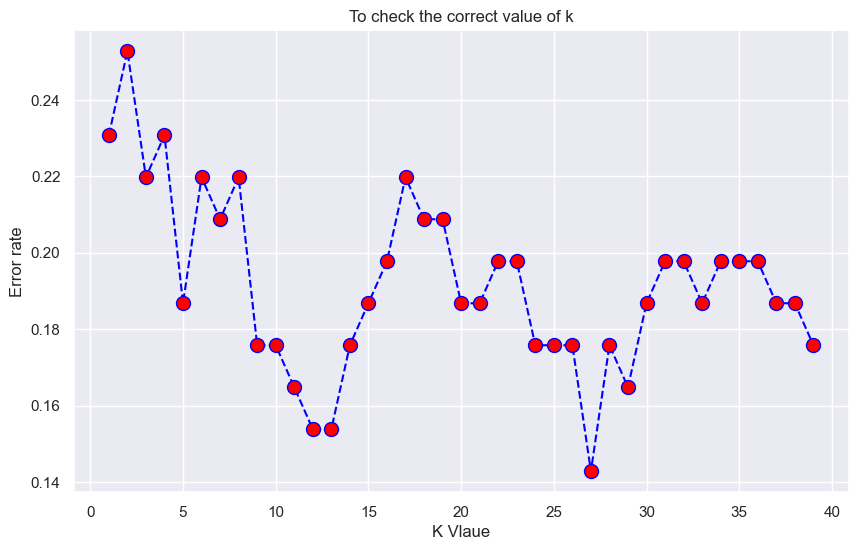

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

#### As we see from the graph we should select K= 12 as it gives the best error rate

In [56]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,encoded_y)
ypred4= knn.predict(x_test)


In [57]:
knn_conf_matrix = confusion_matrix(encoded_ytest,ypred4 )
knn_acc_score = accuracy_score(encoded_ytest, ypred4)

In [58]:
knn_conf_matrix

array([[35,  9],
       [ 5, 42]], dtype=int64)

In [59]:
print(knn_acc_score*100,"%")

84.61538461538461 %


#### As we see KNN gives us an accuracy of around 85% which is good

### Support Vector Machine(SVM)

In [60]:
from sklearn import svm

In [61]:
svm= svm.SVC()

In [62]:
svm.fit(x_train,encoded_y)

SVC()

In [63]:
ypred5= svm.predict(x_test)

In [64]:
svm_conf_matrix = confusion_matrix(encoded_ytest,ypred5)
svm_acc_score = accuracy_score(encoded_ytest, ypred5)

In [65]:
svm_conf_matrix

array([[34, 10],
       [ 8, 39]], dtype=int64)

In [66]:
print(svm_acc_score*100,"%")

80.21978021978022 %


#### We get an accuracy of 80% in SVM

#### Let us see our model accuracy in Table form

In [67]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})

In [68]:
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [69]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
2,Random Forest,81.318681
4,SVM,80.219780
1,Decision Tree,70.329670


#### Let us use one more Techniques known as Adaboost, this is a Boosting technique which uses multiple models for better accuracy.

### Adaboost  Classifier

#### Let us first use some random parameters for training the model without Hypertuning.

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
adab= AdaBoostClassifier(base_estimator=svm,n_estimators=100,algorithm='SAMME',learning_rate=0.01,random_state=0)

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [72]:
adab.fit(x_train,encoded_y)

NameError: name 'adab' is not defined

In [73]:
ypred6=adab.predict(x_test)

NameError: name 'adab' is not defined

In [74]:
adab_conf_matrix = confusion_matrix(encoded_ytest,ypred6)
adab_acc_score = accuracy_score(encoded_ytest, ypred6)

NameError: name 'ypred6' is not defined

In [ ]:
adab_conf_matrix

array([[ 0, 44],
       [ 0, 47]])

In [ ]:
print(adab_acc_score*100,"%")

51.64835164835166 %


In [ ]:
adab.score(x_train,encoded_y)

0.5566037735849056

In [ ]:
adab.score(x_test,encoded_ytest)

0.5164835164835165

#### As we see our model has performed very poorly with just 50% accuracy 

#### We will use Grid Seach CV for HyperParameter Tuning

### Grid Search CV

#### Let us try Grid Search CV for our top 3 performing Algorithms for HyperParameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
4,SVM,80.219780
2,Random Forest,75.824176
1,Decision Tree,70.329670


### Logistic Regression

In [ ]:
param_grid= {
    
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
    
}

In [ ]:
grid1= GridSearchCV(LogisticRegression(),param_grid)

In [ ]:
grid1.fit(x_train,encoded_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [ ]:
grid1.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

#### Let us apply these para in our Model

In [ ]:
logreg1= LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [ ]:
logreg1.fit(x_train,encoded_y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg_pred= logreg1.predict(x_test)

In [ ]:
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest,logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest, logreg_pred)

In [ ]:
logreg_pred_conf_matrix

array([[33, 11],
       [ 6, 41]])

In [1]:
print(logreg_pred_acc_score*100,"%")

NameError: name 'logreg_pred_acc_score' is not defined

#### We got an accuracy of 81%

### KNN

In [ ]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [ ]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=12, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

#### Let's apply

In [ ]:
knn= KNeighborsClassifier(n_neighbors=12,metric='manhattan',weights='distance')
knn.fit(x_train,encoded_y)
knn_pred= knn.predict(x_test)

In [ ]:
knn_pred_conf_matrix = confusion_matrix(encoded_ytest,knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest, knn_pred)

In [ ]:
knn_pred_conf_matrix

array([[33, 11],
       [ 5, 42]])

In [ ]:
print(knn_pred_acc_score*100,"%")

82.41758241758241 %


#### We have an Accuracy of 82.5%

### SVM

In [ ]:

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

#### Let us apply these

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc= SVC(C= 0.1, gamma= 'scale',kernel= 'sigmoid')

In [ ]:
svc.fit(x_train,encoded_y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_pred= svc.predict(x_test)

In [ ]:
svm_pred_conf_matrix = confusion_matrix(encoded_ytest,svm_pred)
svm_pred_acc_score = accuracy_score(encoded_ytest, svm_pred)

In [ ]:
svm_pred_conf_matrix

array([[32, 12],
       [ 5, 42]])

In [ ]:
print(svm_pred_acc_score*100,"%")

81.31868131868131 %


#### Accuracy is 81%

## Final Verdict

#### After comparing all the models the best performing model is :
### Logistic Regression with no Hyperparameter tuning

In [ ]:
logreg= LogisticRegression()
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

In [ ]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [ ]:
print(lr_acc_score*100,"%")

85.71428571428571 %


#### Let us build a proper confusion matrix for our model

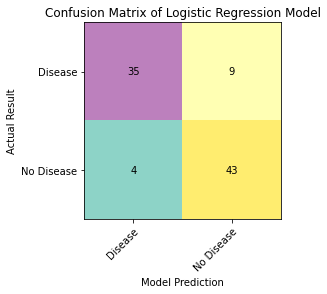

ACCURACY of our model is  85.71428571428571 %


In [ ]:
# Confusion Matrix of  Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(lr_conf_matrix, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY of our model is ",lr_acc_score*100,"%")

#### We have succesfully made our model which predicts weather a person is having a risk of Heart Disease or not with 85.7% accuracy

In [ ]:
import pickle

In [ ]:
pickle.dump(logreg,open('heart.pkl','wb'))

# **Using Auto ML**

In [ ]:
df= pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let us split our Data Set into Dependent i.e our Targer variable and independent variable

In [ ]:
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [ ]:
y= df.iloc[:,-1:]
y= lbl.fit_transform(y)
y

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Importing Eval ML Library**

In [ ]:
import evalml

Eval ML Library will do all the pre processing techniques for us and split the data for us

In [ ]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

There are different problem type parameters in Eval ML, we have a Binary type problem here, that's why we are using Binary as a input

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

**Running the Auto ML to select best Algorithm**

In [ ]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

Using default limit of max_batches=1.

Generating pipelines to search over...
8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: random_forest, extra_trees, decision_tree, lightgbm, linear_model, catboost, xgboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 15.699

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.488
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 7.031
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.452
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.517
Logistic Regression Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.488


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:58:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:58:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:58:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.534
Extra Trees Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.442
CatBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.656

Search finished after 00:15            
Best pipeline: Extra Trees Classifier w/ Imputer
Best pipeline Log Loss Binary: 0.441986


As we see from the above output thge Auto ML Classifier has given us the best fit Algorithm which is Extra Trees Classifier with Imputer
We can also commpare the rest of the models

In [ ]:

automl.rankings


,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Extra Trees Classifier w/ Imputer,7,0.441986,0.025672,0.456773,97.184590,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,3,Random Forest Classifier w/ Imputer,3,0.451508,0.021426,0.466939,97.123934,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,5,Logistic Regression Classifier w/ Imputer + St...,5,0.488080,0.031375,0.520345,96.890973,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,1,Elastic Net Classifier w/ Imputer + Standard S...,1,0.488306,0.030127,0.519350,96.889536,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,4,LightGBM Classifier w/ Imputer,4,0.517282,0.019277,0.539132,96.704958,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,6,XGBoost Classifier w/ Imputer,6,0.534406,0.052329,0.592613,96.595882,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,8,CatBoost Classifier w/ Imputer,8,0.655683,0.002337,0.654572,95.823353,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,2,Decision Tree Classifier w/ Imputer,2,7.031453,0.909063,6.980170,55.210248,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0,15.698798,0.135402,15.776972,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [ ]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Imputer': ['Imputer', 'X', 'y'], 'Extra Trees Classifier': ['Extra Trees Classifier', 'Imputer.x', 'y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1}}, random_seed=0)

In [ ]:
best_pipeline=automl.best_pipeline

We can have a Detailed description of our Best Selected Model

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 2.1 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.457       0.584 0.785 0.893      0.857 0.738                     0.779            0.790        161           81
1                      0.412       0.676 0.806 0.903      0.833 0.822                     0.837   

In [ ]:
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.8852813852813852),
             ('F1', 0.7812499999999999),
             ('Precision', 0.8064516129032258),
             ('Recall', 0.7575757575757576)])

Now if we want to build our Model for a specific objective we can do that 

In [ ]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

Generating pipelines to search over...
8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for AUC. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: random_forest, extra_trees, decision_tree, lightgbm, linear_model, catboost, xgboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean AUC: 0.500

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.847
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.723
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.874
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.843
Logistic Regression Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.848


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:05:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:05:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:05:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.849


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Extra Trees Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.887
CatBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.822

Search finished after 00:14            
Best pipeline: Extra Trees Classifier w/ Imputer
Best pipeline AUC: 0.887205


In [ ]:
automl_auc.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Extra Trees Classifier w/ Imputer,7,0.887205,0.018958,0.892506,38.720539,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,3,Random Forest Classifier w/ Imputer,3,0.873658,0.013643,0.869779,37.365775,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,6,XGBoost Classifier w/ Imputer,6,0.849162,0.027477,0.818182,34.916166,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,5,Logistic Regression Classifier w/ Imputer + St...,5,0.848007,0.017890,0.842752,34.800710,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,1,Elastic Net Classifier w/ Imputer + Standard S...,1,0.847393,0.016866,0.842752,34.739285,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,4,LightGBM Classifier w/ Imputer,4,0.842994,0.013211,0.837224,34.299356,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,8,CatBoost Classifier w/ Imputer,8,0.821640,0.023350,0.796069,32.163982,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,2,Decision Tree Classifier w/ Imputer,2,0.722694,0.052690,0.746929,22.269429,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.000000,0.500000,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [ ]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 2.1 seconds

Cross Validation
----------------
              AUC    F1  Precision # Training # Validation
0           0.893 0.738      0.857        161           81
1           0.903 0.822      0.833        161           81
2           0.866 0.712      0.913        162           80
mean        0.887 0.757      0.868          -            -
std         0.019 0.057      0.041          -            -
coef of var 0.021 

In [ ]:
best_pipeline_auc = automl_auc.best_pipeline


In [ ]:

# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.8852813852813852)])

We got an 88.5 % AUC Score which is the highest of all

Save the model

In [ ]:
best_pipeline.save("model.pkl")

Loading our Model

In [ ]:

final_model=automl.load('model.pkl')

In [ ]:
final_model.predict_proba(X_test)

,0,1
0,0.468324,0.531676
1,0.093848,0.906152
2,0.383646,0.616354
3,0.107272,0.892728
4,0.141027,0.858973
...,...,...
56,0.268136,0.731864
57,0.846652,0.153348
58,0.861607,0.138393
59,0.739515,0.260485
